In [85]:
import numpy as np 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
import tensorflow.keras.optimizers as optim
import tensorflow.keras.datasets as datasets
import tensorflow as tf
from PIL import Image 
import matplotlib.pyplot as plt

In [86]:
data = datasets.mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

In [87]:
x_train= x_train/255.0
x_test= x_test/255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [88]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [89]:
optimizer = optim.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
history = model.fit(x_train,y_train,epochs =100, batch_size=64,validation_split=0.1)

Epoch 1/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8717 - loss: 0.4234 - val_accuracy: 0.9828 - val_loss: 0.0574
Epoch 2/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9842 - loss: 0.0494 - val_accuracy: 0.9900 - val_loss: 0.0395
Epoch 3/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9913 - val_loss: 0.0314
Epoch 4/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9915 - loss: 0.0253 - val_accuracy: 0.9902 - val_loss: 0.0364
Epoch 5/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9920 - val_loss: 0.0290
Epoch 6/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9925 - val_loss: 0.0307
Epoch 7/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9966 - loss: 0.0104 - val_accuracy: 0.9893 - val_loss: 0.0377
Epoch 8/100
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accu

In [91]:
loss,and_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", and_acc)
print("Test loss:", loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0992
Test accuracy: 0.9932000041007996
Test loss: 0.0767095610499382


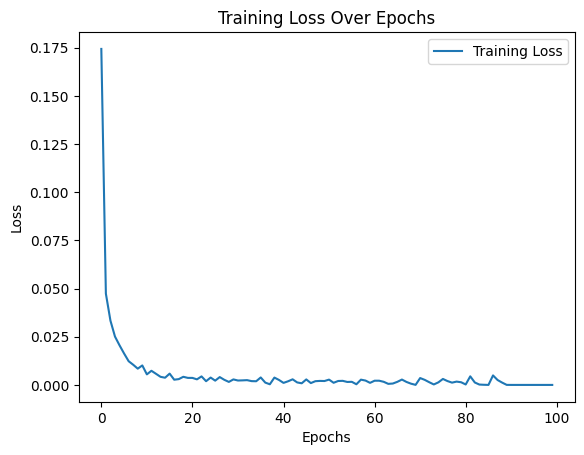

In [92]:
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [94]:
model.save('digitmodel.h5')